# **K-means Clustering**

* K-mean clustering is a type of unsupervised learning algorithm.
* It works on unlabeled data. 
* It make clusters from unlabeled data.

## **Example**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Step 1: Load and Explore the Iris Dataset

In [31]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
features = iris.feature_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=features)
df['target'] = y
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


Step 2: Preprocessing (Standardize & Reduce Dimensions)

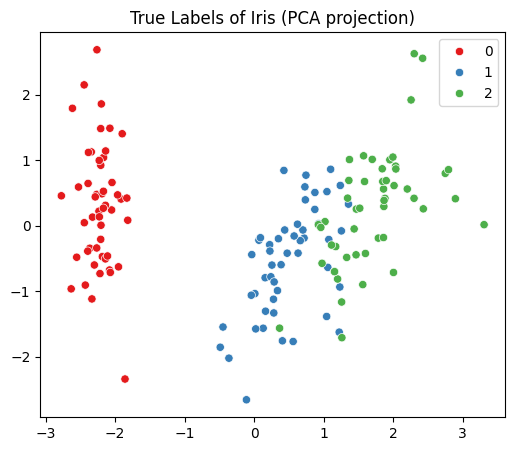

In [32]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the real labels
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title('True Labels of Iris (PCA projection)')
plt.show()


In [50]:
X_pca[:, 0]


array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
       -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
       -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
       -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905,
       -1.914323  , -2.20701284, -2.7743447 , -1.81866953, -2.22716331,
       -1.95184633, -2.05115137, -2.16857717, -2.13956345, -2.26526149,
       -2.14012214, -1.83159477, -2.61494794, -2.44617739, -2.10997488,
       -2.2078089 , -2.04514621, -2.52733191, -2.42963258, -2.16971071,
       -2.28647514, -1.85812246, -2.5536384 , -1.96444768, -2.13705901,
       -2.0697443 , -2.38473317, -2.39437631, -2.22944655, -2.20383344,
        1.10178118,  0.73133743,  1.24097932,  0.40748306,  1.0754747 ,
        0.38868734,  0.74652974, -0.48732274,  0.92790164,  0.01142619,
       -0.11019628,  0.44069345,  0.56210831,  0.71956189, -0.0333547 ,
        0.87540719,  0.35025167,  0.15881005,  1.22509363,  0.16

 Step 3: K-Means Clustering

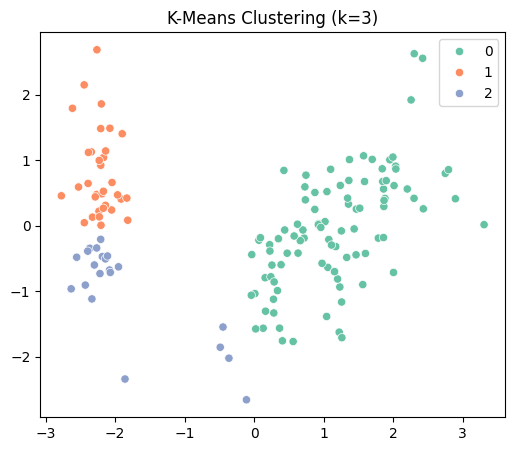

In [33]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Plot K-Means clusters
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set2')
plt.title('K-Means Clustering (k=3)')
plt.show()


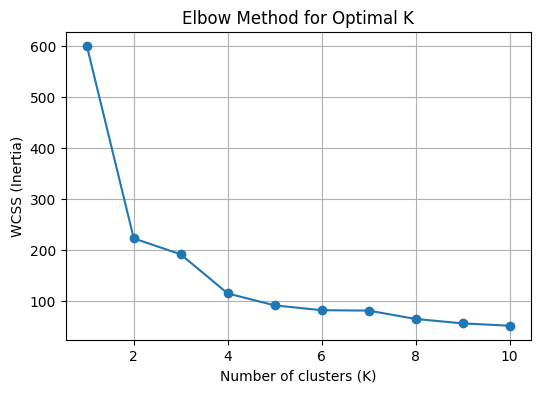

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try K from 1 to 10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # .inertia_ is the WCSS

# Plot Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


Sample data


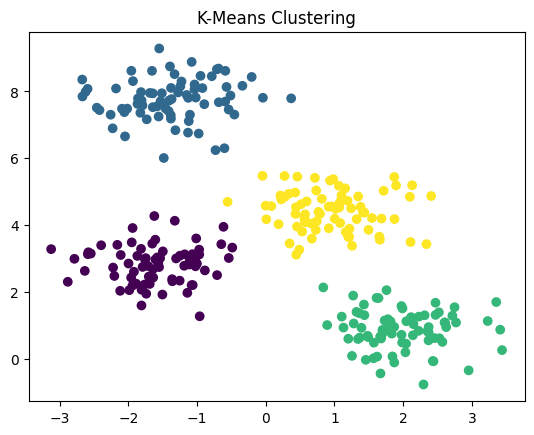

In [34]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# generate sample data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# initiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=4)
# fit the data to the KMeans algorithm
kmeans.fit(X)

# get the predicted cluster labels for each data point
labels = kmeans.labels_

# plot the data points with different colors for different clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('K-Means Clustering')
plt.show()

# Let's practice on diamond dataset

In [35]:
df = sns.load_dataset('diamonds')
df.head(3)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31

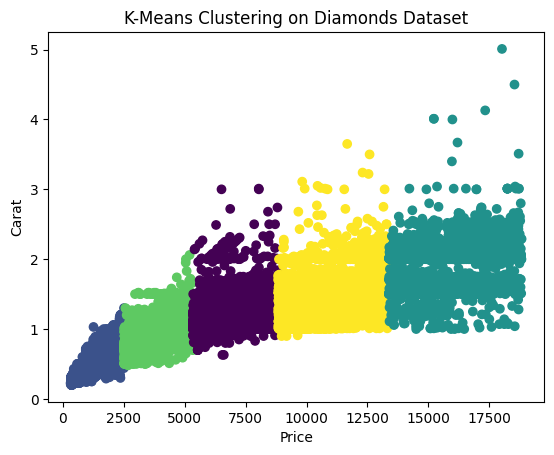

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = sns.load_dataset('diamonds')

X = df[['price', 'carat']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Add predicted cluster labels as a new column to the original dataset
df['labels'] = labels

# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Price")
plt.ylabel("Carat")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

<Axes: xlabel='labels', ylabel='price'>

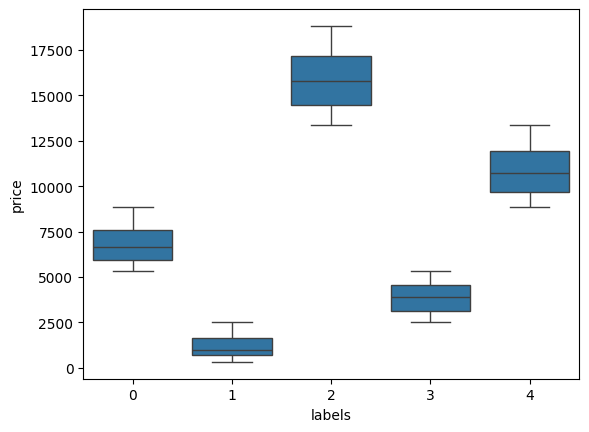

In [37]:
sns.boxplot(x='labels', y='price', data=df)

In [38]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z  labels
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43       1
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31       1
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31       1
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63       1
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75       1

In [39]:
df.labels.unique()

array([1, 3, 0, 4, 2])

# lets change the number of clusters

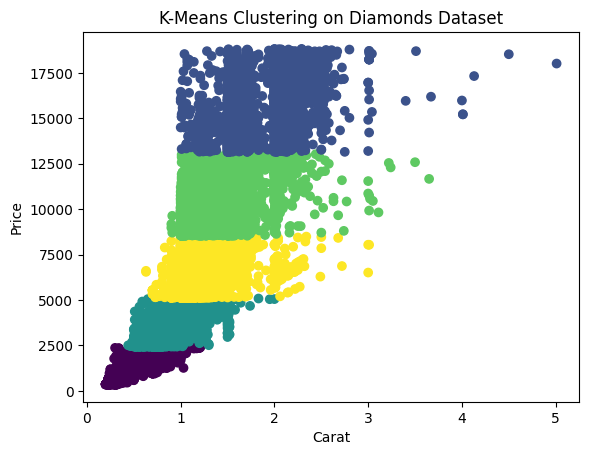

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

diamonds = sns.load_dataset('diamonds')
# Select relevant columns
X = diamonds[["carat", "price", "cut", "color", "clarity"]]

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Instantiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the data to the KMeans algorithm
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Add predicted cluster labels as a new column to the original dataset
diamonds['labels'] = labels

# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

# Can we plot categorical data? with numerical?

In [41]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'labels'],
      dtype='object')

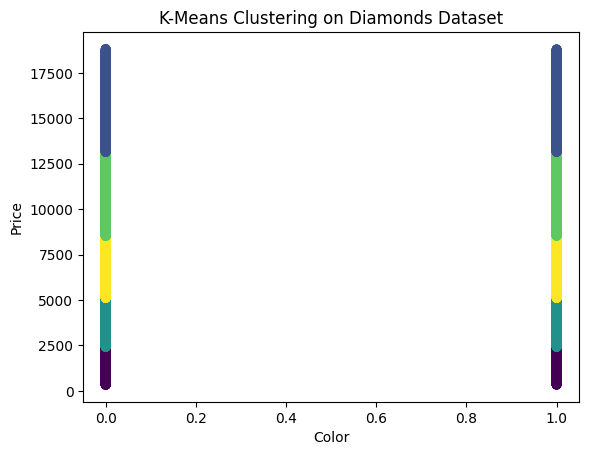

In [42]:
# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 2], X.iloc[:, 1], c=labels)
plt.xlabel("Color")
plt.ylabel("Price")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

# Which kind of input variables can we take in k means clustering?

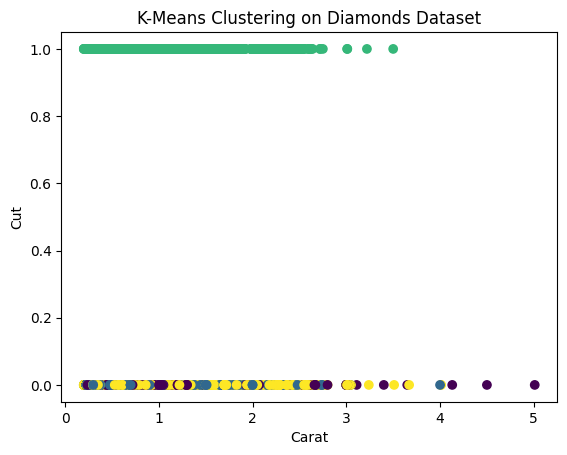

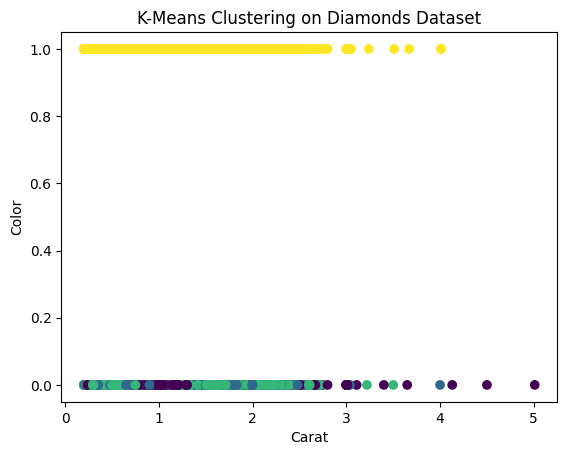

In [43]:
# Select relevant columns
X = diamonds[["carat", "cut", "color"]]

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Instantiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=4)

# Fit the data to the KMeans algorithm
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Add predicted cluster labels as a new column to the original dataset
diamonds['labels'] = labels

# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel("Carat")
plt.ylabel("Cut")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=labels, cmap='viridis')
plt.xlabel("Carat")
plt.ylabel("Color")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

## Adding cluster labels to the data for further EDA work

In [44]:
# Select relevant columns
X = diamonds[["carat", "price"]]

# Instantiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the data to the KMeans algorithm
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.predict(X)

# Add predicted cluster labels as a new column to the original dataset
diamonds['labels'] = labels

# Display the first few rows of the dataset with the new column added
print(diamonds.head())

#display the unique values of a label
print("These are the unique values of labels: ", sorted(diamonds.labels.unique()))

   carat      cut color clarity  depth  table  price     x     y     z  labels
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43       1
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31       1
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31       1
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63       1
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75       1
These are the unique values of labels:  [0, 1, 2, 3, 4]


In [45]:
kmeans.inertia_

37521321222.453026

# Make a parallel coordinate plot using plotly express

In [46]:
import plotly.express as px
fig = px.parallel_coordinates(diamonds, color="labels")
fig.show() 

# **Model Evaluation** 
### 1. **Elbow Method**

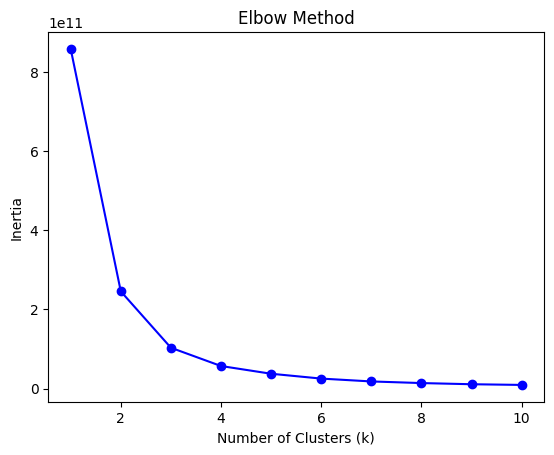

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(1, 11)  # Test k from 1 to 10
inertias = []  # List to store the inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

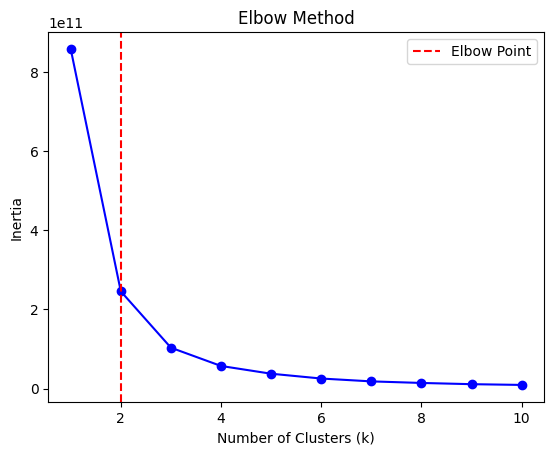

The best number of clusters based on the Elbow Method is: 2


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(1, 11)  # Test k from 1 to 10
inertias = []  # List to store the inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Find the elbow point
diff = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]
best_k = diff.index(max(diff)) + 2

# Add a vertical line to indicate the elbow point
plt.axvline(x=best_k, color='r', linestyle='--', label='Elbow Point')

plt.legend()
plt.show()

print("The best number of clusters based on the Elbow Method is:", best_k)
